In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
df_data = pd.read_feather("../../data/cheek_boyl.ftr")

In [5]:
train_x = np.array(df_data['data'].values.tolist())

In [6]:
train_x.shape

(3986, 512)

In [7]:
train_x[0]

array([0.00000000e+00, 2.55153298e-01, 7.82736838e-02, 1.41440734e-01,
       0.00000000e+00, 7.56606817e-01, 0.00000000e+00, 0.00000000e+00,
       1.60459340e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.92704294e-02, 0.00000000e+00,
       0.00000000e+00, 4.41286772e-01, 0.00000000e+00, 0.00000000e+00,
       2.93090474e-02, 1.53794503e-02, 3.44128758e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.36869603e-01, 5.12035608e-01, 2.72073969e-03, 3.68262120e-02,
       2.32443772e-02, 3.17052513e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.56406358e-01, 2.85057992e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.55371004e-02,
       2.98995506e-02, 0.00000000e+00, 7.84740299e-02, 6.41641557e-01,
       0.00000000e+00, 4.46865767e-01, 0.00000000e+00, 2.63236970e-01,
       5.56585789e-01, 1.93956699e-02, 2.46016812e-02, 1.06976962e+00,
      

In [65]:
# 这里先假设不同的皮肤分类
# 多次尝试发现最佳分类为130，分再多也没有区分度
class_num = 130

In [67]:
lda = LatentDirichletAllocation(n_components=class_num, random_state=0)
lda.fit(train_x)

LatentDirichletAllocation(n_components=130, random_state=0)

In [2]:
from joblib import dump, load

In [68]:
dump(lda, '../../data/models/lda_skin.jb')

['../../data/models/lda_skin.jb']

### 预测结果

20个预设分类的概率

In [47]:
import matplotlib.pyplot as plt

In [15]:
test_result = []
for i in range(len(df_data)):
    test1 = lda.transform([df_data['data'].values[i]])
    se = pd.Series({'f':df_data['file'].values[i], 'class': np.argmax(test1[0])})
    test_result.append(se)

In [16]:
df_result = pd.DataFrame(test_result)

<AxesSubplot:>

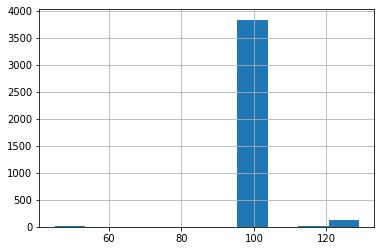

In [17]:
df_result['class'].hist()

(array([0.00119466, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.45850955, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00071679,
        0.        , 0.        , 0.        , 0.        , 0.01576948]),
 array([ 45. ,  47.1,  49.2,  51.3,  53.4,  55.5,  57.6,  59.7,  61.8,
         63.9,  66. ,  68.1,  70.2,  72.3,  74.4,  76.5,  78.6,  80.7,
         82.8,  84.9,  87. ,  89.1,  91.2,  93.3,  95.4,  97.5,  99.6,
        101.7, 103.8, 105.9, 108. , 110.1, 112.2, 114.3, 116.4, 118.5,
        120.6, 122.7, 124.8, 126.9, 129. ]),
 <BarContainer object of 40 artists>)

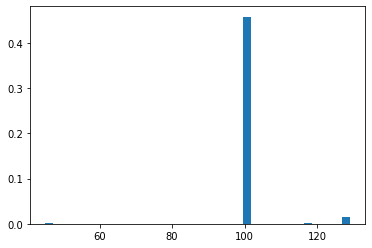

In [71]:
plt.hist(df_result['class'], density=True, bins=40)

### 可视化评估结果

每一类选取5张可视化对比

In [3]:
lda = load('../../data/models/lda_skin.jb')

In [6]:
df_data = pd.read_feather("../../data/cheek_boyl.ftr")

In [18]:
df_samples = df_result.groupby('class').head(5)

In [22]:
df_samples['f'] = df_samples.apply(lambda x: x['f'].replace("/data/soft/skin/cheek/", "../../data/cheek/" + str(x['class']) + "/"), axis=1)

C:\Users\56884\AppData\Local\Temp/ipykernel_10936/2145425306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_samples['f'] = df_samples.apply(lambda x: x['f'].replace("/mnt/nfs196/soft/skin/cheek/", "../../data/cheek/" + str(x['class']) + "/"), axis=1)


In [23]:
df_samples.sort_values(['class', 'f'])

,f,class
1322,../../data/cheek/45/AF1044left_cheek.jpg,45
582,../../data/cheek/45/AF1215left_cheek.jpg,45
199,../../data/cheek/45/AF1275right_cheek.jpg,45
303,../../data/cheek/45/AF548left_cheek.jpg,45
1318,../../data/cheek/45/AF548right_cheek.jpg,45
1,../../data/cheek/101/AF1192right_cheek.jpg,101
2,../../data/cheek/101/AF288left_cheek.jpg,101
4,../../data/cheek/101/AF34right_cheek.jpg,101
3,../../data/cheek/101/AF387right_cheek.jpg,101
0,../../data/cheek/101/AF744right_cheek.jpg,101


In [25]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesHorizontally(list_of_files):
    fig = figure()
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        imshow(image)
        axis('off')

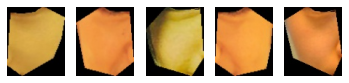

In [27]:
# class = 45
showImagesHorizontally(df_samples[df_samples['class']==45]['f'].values)

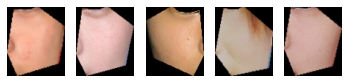

In [28]:
# class = 101
showImagesHorizontally(df_samples[df_samples['class']==101]['f'].values)

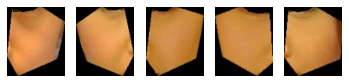

In [29]:
# class = 118
showImagesHorizontally(df_samples[df_samples['class']==118]['f'].values)

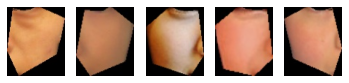

In [30]:
# class = 129
showImagesHorizontally(df_samples[df_samples['class']==129]['f'].values)